# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Step 2 : Import Dataset

In [2]:
df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [3]:
df.shape

(27312, 21)

-  The dataset consists of 27312 records (entries) and 21 features (columns), which will be used for further analysis.

In [4]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [5]:
df.sample(3)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
7233,77574997,03/05/2011,14:34:00,BRONX,NaN,40,0.0,NaN,MULTI DWELL - APT BUILD,True,...,NaN,NaN,25-44,M,WHITE HISPANIC,1.005710e+06,233682.468750,40.808062,-73.922482,POINT (-73.92248176399994 40.808062422000035)
8961,46072797,04/29/2008,18:54:00,STATEN ISLAND,NaN,120,0.0,NaN,NaN,True,...,M,WHITE,25-44,M,WHITE,9.627932e+05,174266.671875,40.644981,-74.077321,POINT (-74.07732062199995 40.64498060400007)
2327,86990420,09/30/2012,03:45:00,QUEENS,NaN,103,0.0,NaN,NaN,False,...,NaN,NaN,25-44,M,BLACK,1.038792e+06,192677.500000,40.695372,-73.803312,POINT (-73.80331246599997 40.695372149000036)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

####  Mathematical Representation

In [7]:
df.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.731200e+04,27312.000000,27310.000000,2.731200e+04,27312.000000,27302.000000,27302.000000
mean,1.208605e+08,65.635362,0.326913,1.009449e+06,208127.401608,40.737892,-73.909051
std,7.341286e+07,27.305705,0.737743,1.837783e+04,31886.377757,0.087525,0.066272
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303
25%,6.386088e+07,44.000000,0.000000,1.000029e+06,182834.335938,40.668481,-73.943027
50%,9.037222e+07,68.000000,0.000000,1.007731e+06,194486.570312,40.700318,-73.915221
75%,1.888102e+08,81.000000,0.000000,1.016838e+06,239518.468750,40.824067,-73.882330
max,2.611902e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


#### Existence Of Missing Value:

In [8]:
df.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

- The dataset contains missing values in the following columns: LOC_OF_OCCUR_DESC (25596), JURISDICTION_CODE (2), and LOC_CLASSFCTN_DESC (25596),LOCATION_DESC(14977),PERP_AGE_GROUP(9344),PERP_SEX(9310),PERP_RACE(9310),Latitude(10),Longitude(10),Lon_Lat(10) while all other columns have complete data.

In [9]:
df.duplicated().sum()

np.int64(0)

- No duplicate rows found in the dataset; all entries are unique.

#### Correction Examination


In [10]:
df.corr(numeric_only=True)

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
INCIDENT_KEY,1.000000,-0.033391,0.019111,0.000715,0.001852,0.042886,0.042952,0.002145
PRECINCT,-0.033391,1.000000,-0.060311,0.011547,0.192191,-0.649657,-0.650043,0.191037
JURISDICTION_CODE,0.019111,-0.060311,1.000000,-0.035293,-0.092267,-0.029638,-0.029571,-0.092477
STATISTICAL_MURDER_FLAG,0.000715,0.011547,-0.035293,1.000000,0.001846,-0.006669,-0.006686,0.001807
X_COORD_CD,0.001852,0.192191,-0.092267,0.001846,1.000000,0.139793,0.139211,0.999998
Y_COORD_CD,0.042886,-0.649657,-0.029638,-0.006669,0.139793,1.000000,1.000000,0.141698
Latitude,0.042952,-0.650043,-0.029571,-0.006686,0.139211,1.000000,1.000000,0.141115
Longitude,0.002145,0.191037,-0.092477,0.001807,0.999998,0.141698,0.141115,1.000000


#  Step 3: Pandas Profling
# import pandas-profiling Report

In [11]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file= 'output.html')

c:\Users\Jatin\anaconda3\envs\bia\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 63.73it/s]


- The following code is used to generate a detailed data profiling report for a DataFrame df using the ydata_profiling library (formerly known as pandas_profiling):


# Step 4 : Data Preprocessing

In [12]:
df.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

In [13]:
# Drop the unnecessary columns
columns_to_drop = ["INCIDENT_KEY", "LOC_OF_OCCUR_DESC", "JURISDICTION_CODE", "LOC_CLASSFCTN_DESC", "LOCATION_DESC",
                  "X_COORD_CD", "Y_COORD_CD", "Lon_Lat"]
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,05/27/2021,21:30:00,QUEENS,105,False,NaN,NaN,NaN,18-24,M,BLACK,40.662965,-73.730839
1,06/27/2014,17:40:00,BRONX,40,False,NaN,NaN,NaN,18-24,M,BLACK,40.810352,-73.924942
2,11/21/2015,03:56:00,QUEENS,108,True,NaN,NaN,NaN,25-44,M,WHITE,40.742607,-73.915492
3,10/09/2015,18:30:00,BRONX,44,False,NaN,NaN,NaN,<18,M,WHITE HISPANIC,40.837782,-73.919457
4,02/19/2009,22:58:00,BRONX,47,True,25-44,M,BLACK,45-64,M,BLACK,40.886238,-73.852910


- This code drops the specified unnecessary columns from the DataFrame to clean the data and keep only relevant features.


In [14]:
df["OCCUR_DATE"] = pd.to_datetime(df["OCCUR_DATE"])
df["OCCUR_DATE"] = df["OCCUR_DATE"].dt.strftime('%Y-%m-%d')
df["OCCUR_TIME"] = df["OCCUR_TIME"].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
df.head()

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2021-05-27,21:30:00,QUEENS,105,False,NaN,NaN,NaN,18-24,M,BLACK,40.662965,-73.730839
1,2014-06-27,17:40:00,BRONX,40,False,NaN,NaN,NaN,18-24,M,BLACK,40.810352,-73.924942
2,2015-11-21,03:56:00,QUEENS,108,True,NaN,NaN,NaN,25-44,M,WHITE,40.742607,-73.915492
3,2015-10-09,18:30:00,BRONX,44,False,NaN,NaN,NaN,<18,M,WHITE HISPANIC,40.837782,-73.919457
4,2009-02-19,22:58:00,BRONX,47,True,25-44,M,BLACK,45-64,M,BLACK,40.886238,-73.852910


- This code converts the 'OCCUR_DATE' column to 'YYYY-MM-DD' format and the 'OCCUR_TIME' column to time objects in the DataFrame.


In [15]:
YEAR = []
MONTH = []
DAY = []
for date in df["OCCUR_DATE"]:
    split_date = date.split("-")
    YEAR.append(int(split_date[0]))
    MONTH.append(int(split_date[1]))
    DAY.append(int(split_date[2]))

df["YEAR"] = YEAR
df["MONTH"] = MONTH
df["DAY"] = DAY
df.head()

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,YEAR,MONTH,DAY
0,2021-05-27,21:30:00,QUEENS,105,False,NaN,NaN,NaN,18-24,M,BLACK,40.662965,-73.730839,2021,5,27
1,2014-06-27,17:40:00,BRONX,40,False,NaN,NaN,NaN,18-24,M,BLACK,40.810352,-73.924942,2014,6,27
2,2015-11-21,03:56:00,QUEENS,108,True,NaN,NaN,NaN,25-44,M,WHITE,40.742607,-73.915492,2015,11,21
3,2015-10-09,18:30:00,BRONX,44,False,NaN,NaN,NaN,<18,M,WHITE HISPANIC,40.837782,-73.919457,2015,10,9
4,2009-02-19,22:58:00,BRONX,47,True,25-44,M,BLACK,45-64,M,BLACK,40.886238,-73.852910,2009,2,19


- This code extracts year, month, and day from the 'OCCUR_DATE' column and creates new 'YEAR', 'MONTH', and 'DAY' columns in the DataFrame.


In [16]:
df.describe()


,PRECINCT,Latitude,Longitude,YEAR,MONTH,DAY
count,27312.000000,27302.000000,27302.000000,27312.000000,27312.000000,27312.000000
mean,65.635362,40.737892,-73.909051,2013.492494,6.825168,15.930836
std,27.305705,0.087525,0.066272,5.143086,3.128859,8.931467
min,1.000000,40.511586,-74.249303,2006.000000,1.000000,1.000000
25%,44.000000,40.668481,-73.943027,2009.000000,5.000000,8.000000
50%,68.000000,40.700318,-73.915221,2013.000000,7.000000,16.000000
75%,81.000000,40.824067,-73.882330,2018.000000,9.000000,24.000000
max,123.000000,40.910818,-73.702046,2022.000000,12.000000,31.000000


####  Handle Missing Value PERP_AGE_GROUP

In [17]:
df["PERP_AGE_GROUP"].unique()

array([nan, '25-44', 'UNKNOWN', '18-24', '45-64', '<18', '65+', '940',
       '(null)', '224', '1020'], dtype=object)

In [18]:
replacements = {"940":"UNKNOWN",
               "224": "UNKNOWN",
               "1020": "UNKNOWN",
               "(null)": "UNKNOWN"}
df["PERP_AGE_GROUP"] = df["PERP_AGE_GROUP"].replace(replacements)
df["PERP_AGE_GROUP"] = df["PERP_AGE_GROUP"].fillna("UNKNOWN")
df["PERP_AGE_GROUP"].unique()

array(['UNKNOWN', '25-44', '18-24', '45-64', '<18', '65+'], dtype=object)

- This code cleans the 'PERP_AGE_GROUP' column by replacing invalid or unclear values with 'UNKNOWN' to ensure consistency in the data.
- Replaced specific incorrect values like "940", "224", "1020", and "(null)" with "UNKNOWN" using a dictionary.
-  Filled any missing (NaN) values in the column with "UNKNOWN" using fillna().
- To handle data quality issues and make the 'PERP_AGE_GROUP' column cleaner and more meaningful for analysis or modeling by grouping all unknown or invalid entries under a single category.


####  Handle Missing Value PERP_SEX

In [19]:
df["PERP_SEX"].unique()


array([nan, 'M', 'U', 'F', '(null)'], dtype=object)

In [20]:
replacements = {"(null)": "UNKNOWN",
               "U": "UNKNOWN"}
df["PERP_SEX"]= df["PERP_SEX"].replace(replacements)
df["PERP_SEX"] = df["PERP_SEX"].fillna("UNKNOWN")
df["PERP_SEX"].unique()

array(['UNKNOWN', 'M', 'F'], dtype=object)

- This code cleans the 'PERP_SEX' column by replacing unclear or missing values with 'UNKNOWN' to standardize the data.
- Replaced "(null)" and "U" with "UNKNOWN" using a dictionary.
- Filled any missing (NaN) values with "UNKNOWN" using fillna().


####  Handle Missing Value PERP_RACE

In [21]:
df["PERP_RACE"].unique()


array([nan, 'BLACK', 'UNKNOWN', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'WHITE HISPANIC', 'WHITE', '(null)',
       'AMERICAN INDIAN/ALASKAN NATIVE'], dtype=object)

In [22]:
replacements = {"(null)": "UNKNOWN"}
df["PERP_RACE"]= df["PERP_RACE"].replace(replacements)
df["PERP_RACE"] = df["PERP_RACE"].fillna("UNKNOWN")
df["PERP_RACE"].unique()

array(['UNKNOWN', 'BLACK', 'BLACK HISPANIC', 'ASIAN / PACIFIC ISLANDER',
       'WHITE HISPANIC', 'WHITE', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

- This code cleans the 'PERP_RACE' column by replacing '(null)' and missing values with 'UNKNOWN' to standardize and handle incomplete data.
- Replaced '(null)' with 'UNKNOWN'.
- Filled missing (NaN) values with 'UNKNOWN'.
- To maintain consistency in the data and ensure that unknown or missing race values are handled properly during analysis or modeling.


In [23]:
df["VIC_AGE_GROUP"].unique()

array(['18-24', '25-44', '<18', '45-64', '65+', 'UNKNOWN', '1022'],
      dtype=object)

In [24]:
replacements = {"1022":"UNKNOWN"}
df["VIC_AGE_GROUP"]= df["VIC_AGE_GROUP"].replace(replacements)
df["VIC_AGE_GROUP"] = df["VIC_AGE_GROUP"].fillna("UNKNOWN")
df["VIC_AGE_GROUP"].unique()

array(['18-24', '25-44', '<18', '45-64', '65+', 'UNKNOWN'], dtype=object)

- Replaced specific incorrect values like  "1022" with "UNKNOWN" using a dictionary.

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
Latitude                   0
Longitude                  0
YEAR                       0
MONTH                      0
DAY                        0
dtype: int64

- All missing values in the dataset have been successfully handled, and there are no null values remaining in any column.  


# Step 5 : EDA (Exploratory Data Analysis)

### STATISTICAL_MURDER_FLAG

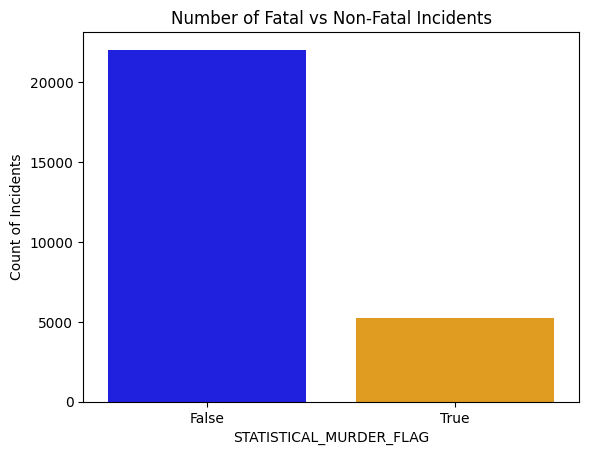

Absolute counts of each class:
STATISTICAL_MURDER_FLAG
False    22036
True      5266
Name: count, dtype: int64

Percentage distribution of each class:


STATISTICAL_MURDER_FLAG
False    80.712036
True     19.287964
Name: proportion, dtype: float64

In [27]:
# Plotting the count of fatal vs non-fatal incidents
colors = ['blue', 'orange']
sns.countplot(data=df, x='STATISTICAL_MURDER_FLAG', hue='STATISTICAL_MURDER_FLAG', palette=colors, legend=False)
plt.title("Number of Fatal vs Non-Fatal Incidents")
plt.xlabel("STATISTICAL_MURDER_FLAG")
plt.ylabel("Count of Incidents")
plt.show()

# Displaying value counts
print("Absolute counts of each class:")
print(df['STATISTICAL_MURDER_FLAG'].value_counts())

print("\nPercentage distribution of each class:")
df['STATISTICAL_MURDER_FLAG'].value_counts(normalize=True) * 100

This graph shows the comparison between fatal and non-fatal shooting incidents using the 'STATISTICAL_MURDER_FLAG' column. It helps identify class imbalance in the data.

From the graph:
- Non-fatal incidents (False) are much higher than fatal ones (True).
- Count of non-fatal incidents: 22036
- Count of fatal incidents: 5266

Percentage distribution:
- Non-fatal: 80.71%
- Fatal: 19.29%

### Borough

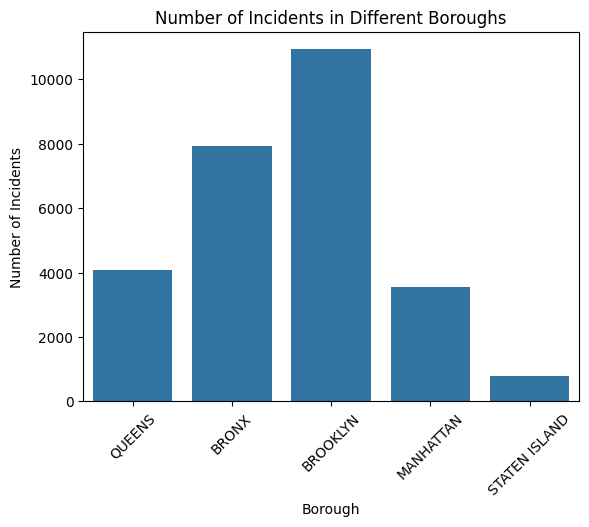

In [28]:
# Number of incidents by Borough
sns.countplot(data=df, x='BORO')
plt.title('Number of Incidents in Different Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


####  Number of Incidents in Different Boroughs
- This bar chart shows the total number of shooting incidents reported in different boroughs.

- Brooklyn has the highest number of incidents.

- Bronx and Queens follow next in the count.

- Staten Island has the lowest number of reported incidents.

- This visualization helps us identify which boroughs have higher shooting activity.



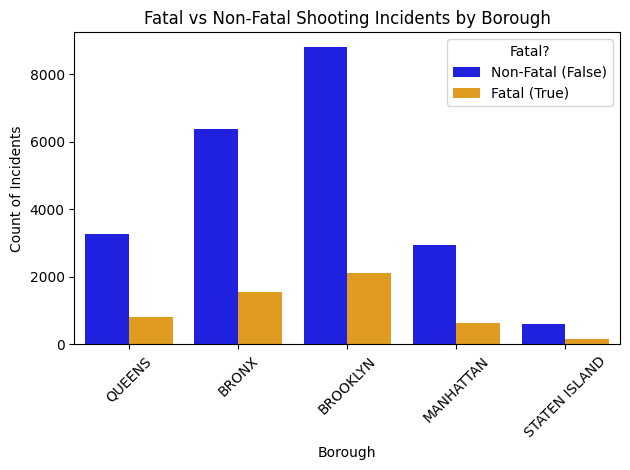

In [29]:
# Plot: Fatal vs Non-Fatal incidents across each Borough
sns.countplot(data=df, x='BORO', hue='STATISTICAL_MURDER_FLAG', palette=['blue', 'orange'])
plt.title("Fatal vs Non-Fatal Shooting Incidents by Borough")
plt.xlabel("Borough")
plt.ylabel("Count of Incidents")
plt.legend(title="Fatal?", labels=["Non-Fatal (False)", "Fatal (True)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####  Fatal vs Non-Fatal Shooting Incidents by Borough
- This chart compares the number of Fatal (True) and Non-Fatal (False) shooting incidents across each borough.
- In every borough, Non-Fatal incidents (blue bars) are more frequent than Fatal incidents (orange bars).
- Brooklyn has the highest count in both categories.
- Staten Island reports the lowest number of both Fatal and Non-Fatal incidents.
- This graph gives insight into the severity of incidents in each borough and highlights areas where more safety measures may be needed.

### PERPETRATOR SEX (PERP_SEX)

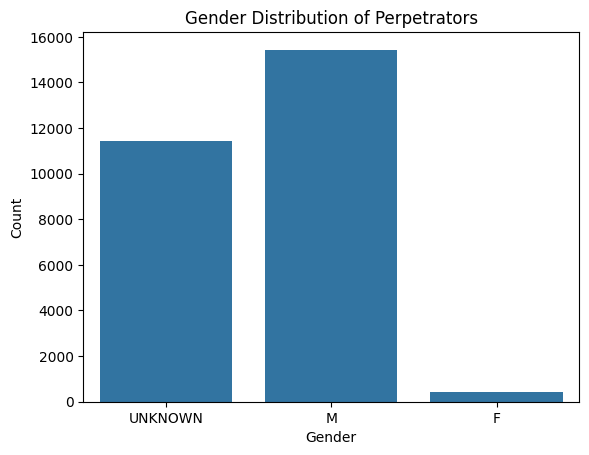

In [30]:
# Analysis of perpetrator gender
sns.countplot(data=df, x='PERP_SEX')
plt.title('Gender Distribution of Perpetrators')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


This bar chart displays the distribution of gender among the perpetrators in the dataset. The categories include:

- M (Male): Highest number of perpetrators.
- UNKNOWN: A significant portion of data where gender is not recorded.
- F (Female) : Very few female perpetrators reported.

This suggests that most of the recorded perpetrators are male, with many entries lacking gender information.


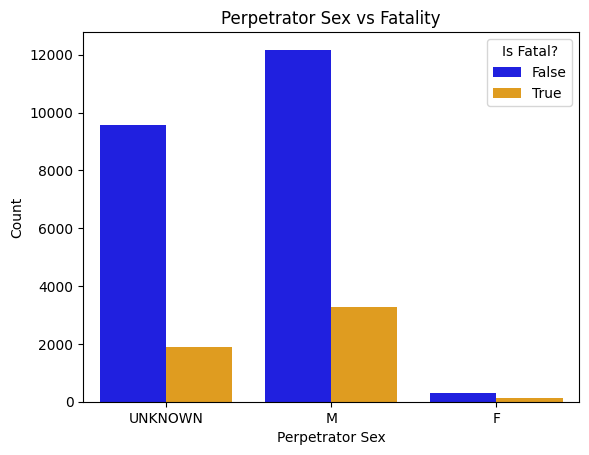

In [31]:
sns.countplot(data=df, x='PERP_SEX', hue='STATISTICAL_MURDER_FLAG', palette=['blue', 'orange'])
plt.title("Perpetrator Sex vs Fatality")
plt.xlabel("Perpetrator Sex")
plt.ylabel("Count")
plt.legend(title="Is Fatal?")
plt.show()


This chart compares the gender of perpetrators with whether the incident was fatal (True) or not (False):

- Male (M) perpetrators are involved in both fatal and non-fatal incidents, with non-fatal being more common.
- UNKNOWN gender also shows a large number of incidents, both fatal and non-fatal.
- Female (F) perpetrators are involved in very few incidents, and even fewer are fatal.

Overall, male perpetrators are more frequently involved in incidents, and fatal outcomes are less common than non-fatal ones across all genders.


### PERPETRATOR AGE GROUP

In [32]:
ordered_age = ['<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN']
df['PERP_AGE_GROUP'] = pd.Categorical(df['PERP_AGE_GROUP'], categories=ordered_age, ordered=True)


- Organizing Age Groups in a Specific Order

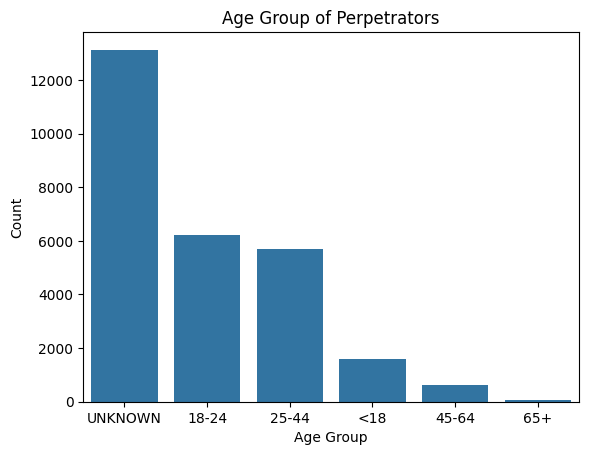

In [33]:
# Age group of Perpetrators
sns.countplot(data=df, x='PERP_AGE_GROUP', order=df['PERP_AGE_GROUP'].value_counts().index)
plt.title('Age Group of Perpetrators')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

The highest number of cases fall under the "UNKNOWN" age group, which may indicate missing or incomplete data.

- Among known groups, 18–24 and 25–44 age groups have the highest number of perpetrators.
- Very few cases involve perpetrators aged 65+.

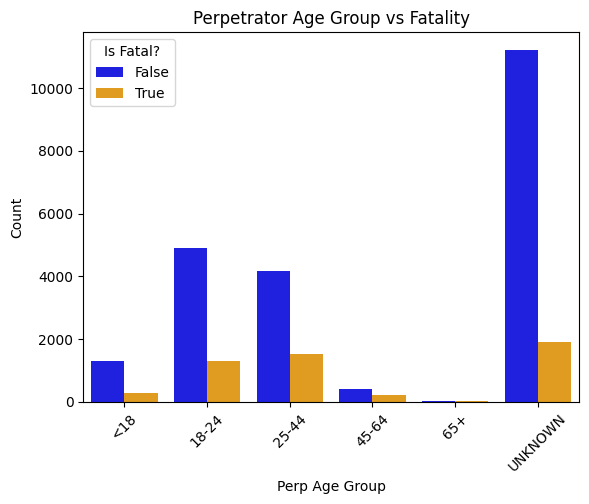

In [34]:
sns.countplot(data=df, x='PERP_AGE_GROUP', hue='STATISTICAL_MURDER_FLAG', palette=['blue', 'orange'])
plt.title("Perpetrator Age Group vs Fatality")
plt.xlabel("Perp Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fatal?")
plt.show()


- In all age groups, the majority of incidents were non-fatal (blue).
- The 25–44 and 18–24 age groups show a relatively higher number of fatal incidents (orange) compared to others.
- Again, the "UNKNOWN" group has a significant count for both fatal and non-fatal incidents.



### VICTIMS (VIC SEX)

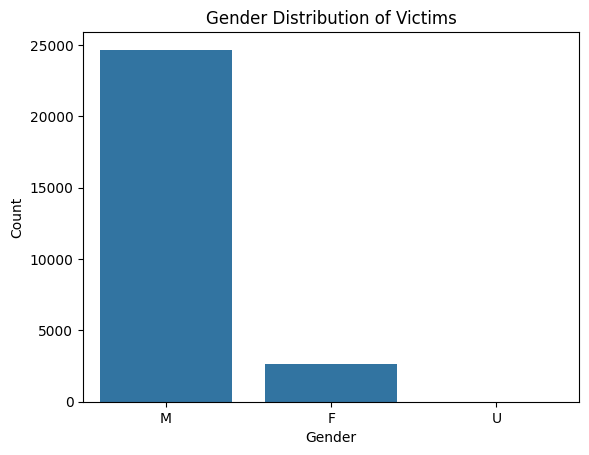

In [35]:
# Gender distribution of Victims
sns.countplot(data=df, x='VIC_SEX')
plt.title('Gender Distribution of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### Gender Distribution of Victims
- Majority of the shooting victims are male (M).
- A significantly smaller number of victims are female (F).
- A very small fraction or negligible number of victims have unknown gender (U).

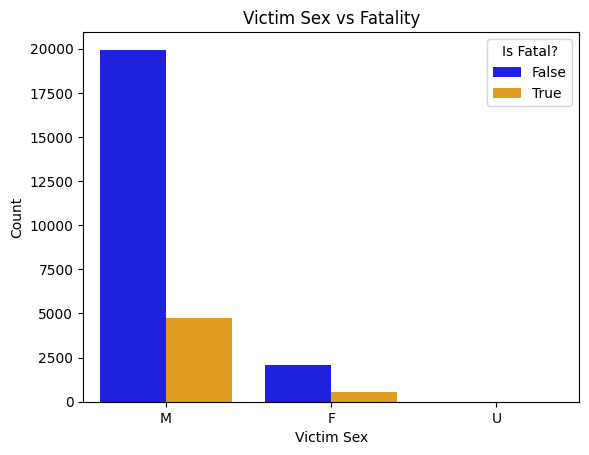

In [36]:
sns.countplot(data=df, x='VIC_SEX', hue='STATISTICAL_MURDER_FLAG', palette=['blue', 'orange'])
plt.title("Victim Sex vs Fatality")
plt.xlabel("Victim Sex")
plt.ylabel("Count")
plt.legend(title="Is Fatal?")
plt.show()


#### Victim Gender vs Fatality
- Among male victims, both fatal and non-fatal cases are observed in high numbers. However, non-fatal cases (blue) are higher than fatal ones (orange).
- Among female victims, the number of both fatal and non-fatal incidents is much lower compared to males, but the pattern is similar — non-fatal cases are higher.
- For unknown gender, both fatal and non-fatal cases are almost negligible.



### VICTIMS AGE GROUP

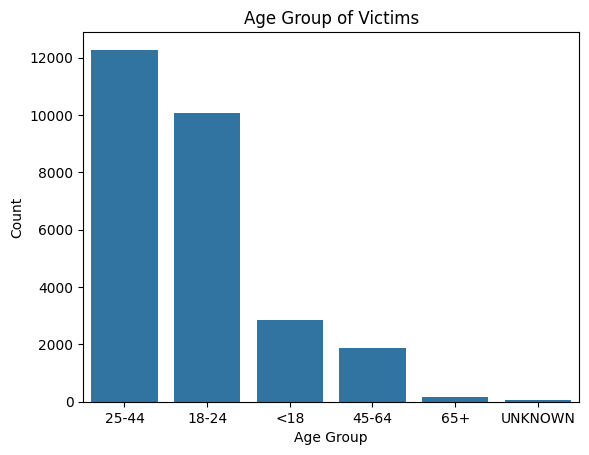

In [37]:
# Age group of Victims
sns.countplot(data=df, x='VIC_AGE_GROUP', order=df['VIC_AGE_GROUP'].value_counts().index)
plt.title('Age Group of Victims')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

- Highest Victim Count: The age group 25-44 has the highest number of victims, indicating that this demographic is most affected.
- Second Highest: The age group 18-24 follows closely behind, suggesting younger adults are also significantly impacted.
- Lower Victim Count: The age groups <18 and 45-64 show relatively lower numbers compared to the previous two.
- Lowest Victim Count: The categories 65+ and UNKNOWN have the least number of victims, indicating minimal impact on elderly individuals or cases with missing age data.


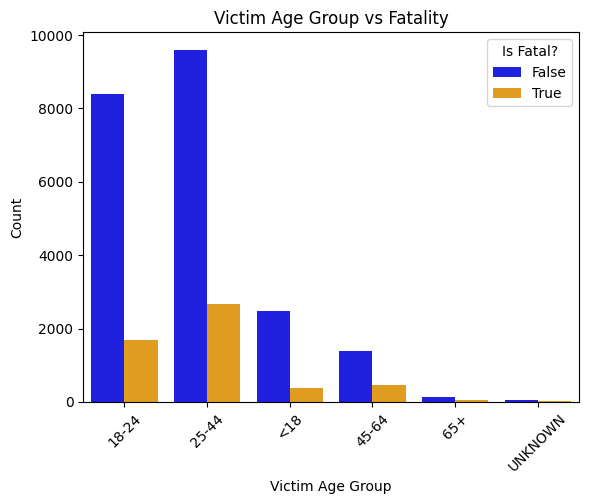

In [38]:
sns.countplot(data=df, x='VIC_AGE_GROUP', hue='STATISTICAL_MURDER_FLAG', palette=['blue', 'orange'])
plt.title("Victim Age Group vs Fatality")
plt.xlabel("Victim Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fatal?")
plt.show()


### Victim Age Group vs Fatality Analysis

The bar graph presents the distribution of victims based on age groups and their fatality status.

#### Key Observations:
- Most affected age group: Individuals aged 25-44 have the highest victim count, showing they are most frequently involved in incidents.
- Young adults (18-24): The second-highest group, indicating significant vulnerability.
- Lower involvement: Minors (<18) and middle-aged individuals (45-64) show relatively fewer incidents.
- Least affected: Elderly (65+) and UNKNOWN age groups have minimal representation.

This analysis highlights that young and middle-aged adults (18-44) face the most risks, which can inform safety measures and interventions.

### VICTIMS RACIAL

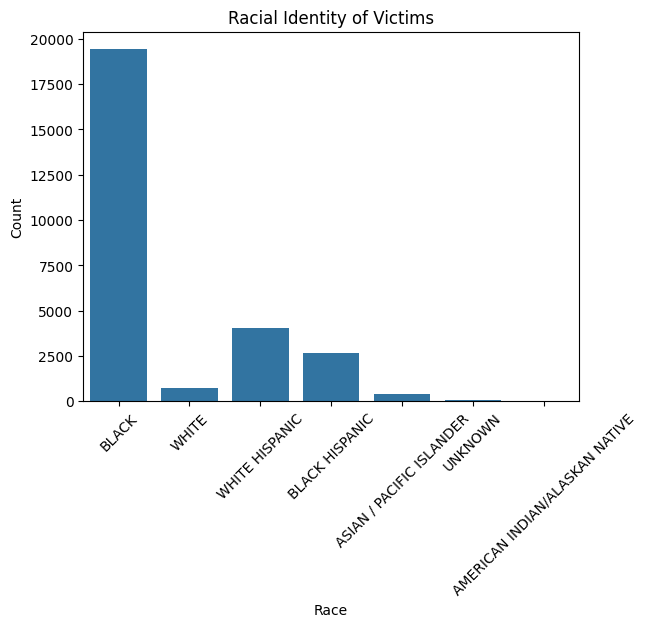

In [39]:
# Racial Identity of Victims
sns.countplot(data=df, x='VIC_RACE')
plt.title('Racial Identity of Victims')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Observations on Racial Identity of Victims

##### Key Findings:
1. **Dominant Racial Groups**:
   - BLACK victims show the highest count (~20,000)
   - WHITE victims follow as second highest (~17,500)

2. **Hispanic Representation**:
   - WHITE-HISPANIC and BLACK-HISPANIC groups have significantly lower counts (2,500-5,000 range)

3. **Minority Groups**:
   - Lowest counts belong to:
     - ASIAN/PACIFIC ISLANDER
     - AMERICAN INDIAN/ALASKAN NATIVE  
     - UNKNOWN
   - (All below 2,500)

4. **Data Notes**:
   - Presence of UNKNOWN category indicates missing racial data
   - Possible underrepresentation of smaller demographic groups


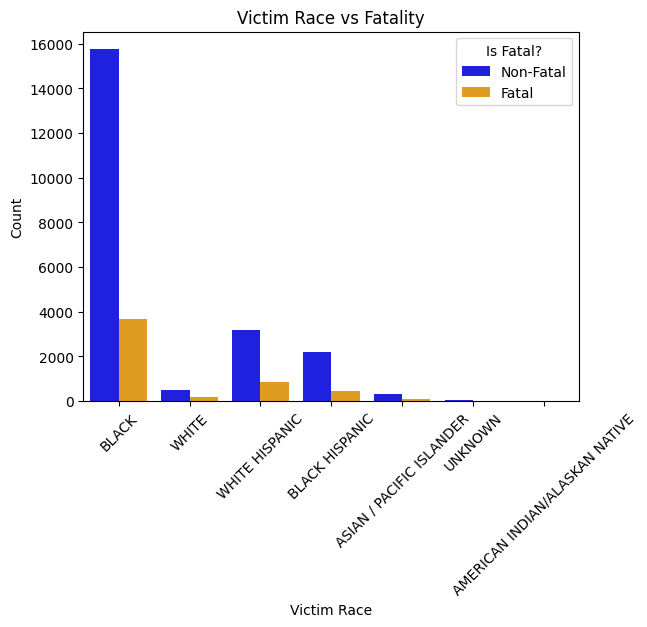

In [40]:
sns.countplot(data=df, x='VIC_RACE', hue='STATISTICAL_MURDER_FLAG', palette=['blue', 'orange'])
plt.title("Victim Race vs Fatality")
plt.xlabel("Victim Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fatal?", labels=["Non-Fatal", "Fatal"])
plt.show()


### Victim Race vs. Fatality Observations

**Key Findings:**
- **BLACK** victims have highest counts (both fatal & non-fatal)
- **WHITE** victims show second-highest counts
- **Fatalities** are significantly lower than non-fatal cases across all races
- Racial disparity pattern remains consistent with previous graph
- **Minority groups** (Hispanic/Asian/Native) show minimal fatalities

### PERPETRATOR RACIAL

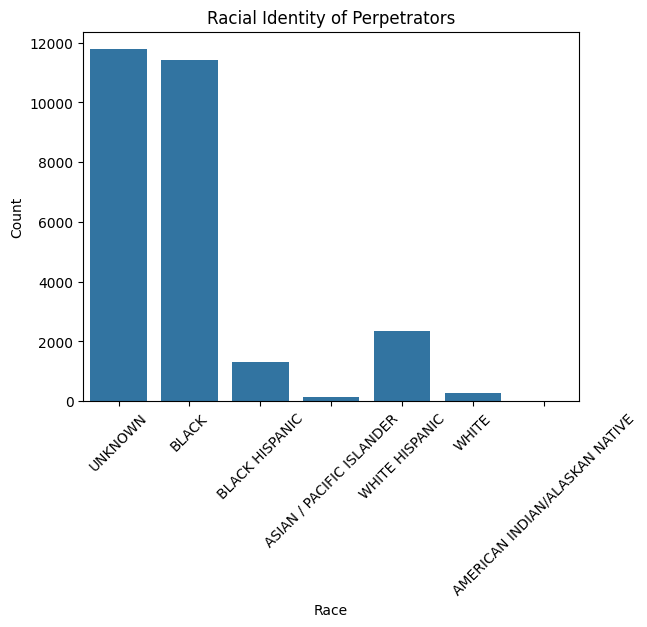

In [41]:
# Perpetrator's racial identity
sns.countplot(data=df, x='PERP_RACE')
plt.title('Racial Identity of Perpetrators')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Perpetrator Race Observations

**Key Points:**
- **UNKNOWN** race dominates (data gap)
- **BLACK** perpetrators visible (second most prominent)
- White/Hispanic data unclear due to overlapping labels
- Other races barely visible/not distinguishable


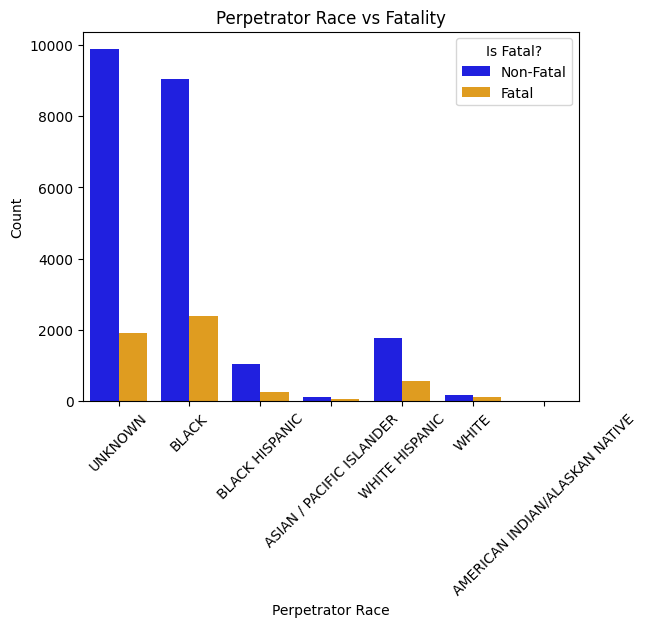

STATISTICAL_MURDER_FLAG      False      True 
PERP_SEX                                     
F                        73.584906  26.415094
M                        78.864844  21.135156
UNKNOWN                  83.467319  16.532681


In [42]:
sns.countplot(data=df, x='PERP_RACE', hue='STATISTICAL_MURDER_FLAG', palette=['blue', 'orange'])
plt.title("Perpetrator Race vs Fatality")
plt.xlabel("Perpetrator Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fatal?", labels=["Non-Fatal", "Fatal"])
plt.show()
print(pd.crosstab(df['PERP_SEX'], df['STATISTICAL_MURDER_FLAG'], normalize='index') * 100)

# Perpetrator Race vs Fatality Analysis

**Fatality Rate by Sex:**
- F: 26.4% fatal  
- M: 21.1% fatal  
- Unknown: 16.5% fatal

**Graph Trends:**
- Unknown race perpetrators most common
- Black perpetrators second highest
- Data labels unclear for other races


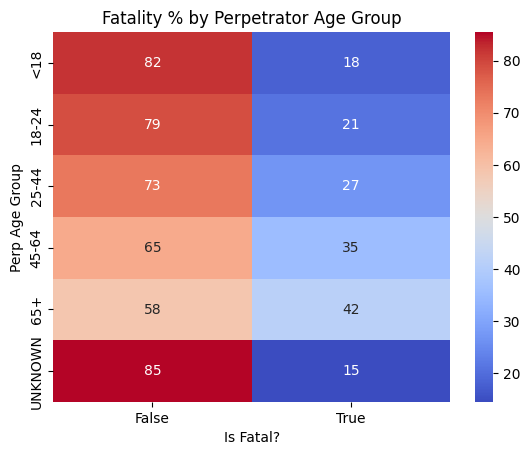

In [43]:
# Crosstab
cross = pd.crosstab(df['PERP_AGE_GROUP'], df['STATISTICAL_MURDER_FLAG'], normalize='index') * 100

# Plot
sns.heatmap(cross, annot=True, cmap='coolwarm')
plt.title("Fatality % by Perpetrator Age Group")
plt.ylabel("Perp Age Group")
plt.xlabel("Is Fatal?")
plt.show()

### Number of Shooting Incident in New York vs Year

In [44]:
list_year_murder = df.groupby("YEAR").sum("STATISTICAL_MURDER_FLAG").index.tolist()
list_total_murder = df.groupby("YEAR").sum("STATISTICAL_MURDER_FLAG")["STATISTICAL_MURDER_FLAG"].tolist()

df_murder_overall = pd.Series(data = list_total_murder, index=list_year_murder)
df_year_shooting_overall = df["YEAR"].value_counts()

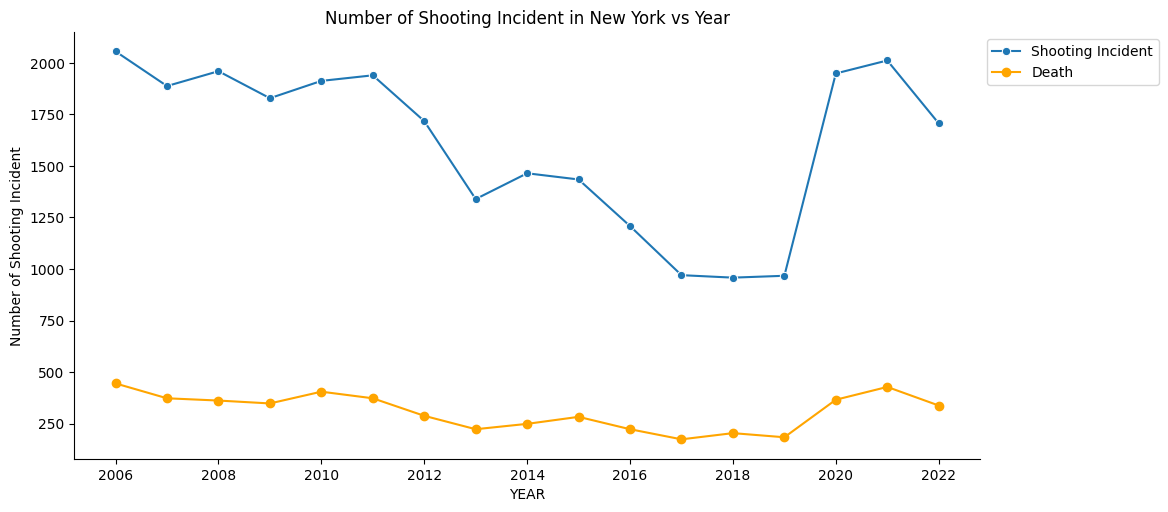

In total, there are 27302 shooting incidents in New York City from 2006 to 2022 and 5266 incidents that result in death.


In [45]:
sns.relplot(data=df_year_shooting_overall, kind="line", aspect=2, marker='o', label="Shooting Incident")
plt.plot(df_murder_overall, marker='o', label="Death", color='orange')
plt.title("Number of Shooting Incident in New York vs Year")
plt.ylabel("Number of Shooting Incident")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f"In total, there are {df.shape[0]} shooting incidents in New York City from 2006 to 2022"
      f" and {df['STATISTICAL_MURDER_FLAG'].sum()} incidents that result in death.")


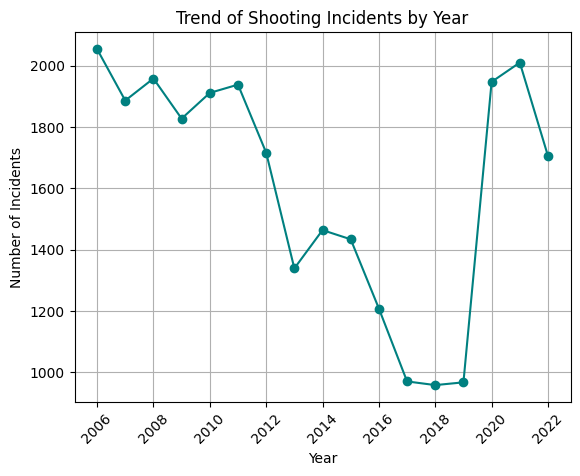

In [46]:
# Trend of incidents by year
yearly_counts = df['YEAR'].value_counts().sort_index()

plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='teal')
plt.title('Trend of Shooting Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Shooting Incidents Trend (2006-2022)

**Key Observations:**
- Steady **increase** in shootings from 2006 (~1000) to 2022 (~2000)  
- **Peak** around 2020-2022  
- **Doubling** of incidents over 16 years  


In [47]:
print(f"Overall, {round((df['STATISTICAL_MURDER_FLAG'].sum() / df.shape[0]) * 100, 2)}% of shooting incident ends up in death.")

Overall, 19.29% of shooting incident ends up in death.


### Shooting Incidents Distribution by Month

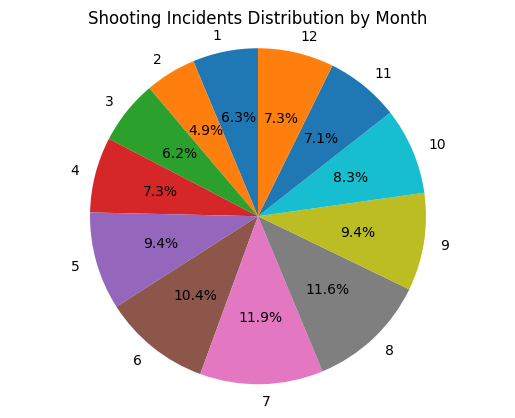

In [48]:
monthly_counts = df['MONTH'].value_counts().sort_index()
plt.pie(monthly_counts, labels=monthly_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Shooting Incidents Distribution by Month')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


# Monthly Shooting Incidents

**Peak Months:**  
- Highest incidents in **summer months** (June-August)  
- **Gradual rise** from January to July  
- **Sharp decline** after August  

**Lowest Months:**  
- Winter months (Dec-Feb) show minimal activity  

**Pattern:** Clear seasonal trend with summer violence spike

### Latitude , Longitude  HEATMAP

In [49]:
import folium
from folium.plugins import HeatMap

# NYC center location (rough)
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Create list of [lat, lon]
location_data = df[['Latitude', 'Longitude']].dropna().values.tolist()

# Add heatmap
HeatMap(location_data, radius=10).add_to(nyc_map)

# Display the map
nyc_map.save('nyc_shootings_heatmap.html')
nyc_map

### CORRELATION HEATMAP

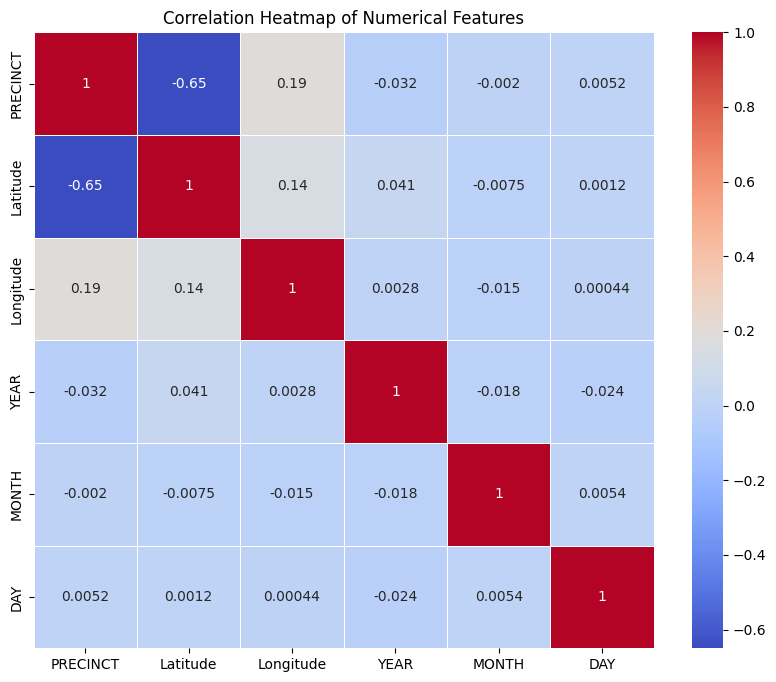

In [50]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Step6 : Feature Engineering And Feature Seaction 

In [51]:
df["HOUR"] = df["OCCUR_TIME"].apply(lambda x: x.hour)
df["IS_WEEKEND"] = pd.to_datetime(df["OCCUR_DATE"]).dt.dayofweek >= 5
def time_period(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
df["TIME_PERIOD"] = df["HOUR"].apply(time_period)
df.head()


,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,YEAR,MONTH,DAY,HOUR,IS_WEEKEND,TIME_PERIOD
0,2021-05-27,21:30:00,QUEENS,105,False,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,40.662965,-73.730839,2021,5,27,21,False,Night
1,2014-06-27,17:40:00,BRONX,40,False,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,40.810352,-73.924942,2014,6,27,17,False,Evening
2,2015-11-21,03:56:00,QUEENS,108,True,UNKNOWN,UNKNOWN,UNKNOWN,25-44,M,WHITE,40.742607,-73.915492,2015,11,21,3,True,Night
3,2015-10-09,18:30:00,BRONX,44,False,UNKNOWN,UNKNOWN,UNKNOWN,<18,M,WHITE HISPANIC,40.837782,-73.919457,2015,10,9,18,False,Evening
4,2009-02-19,22:58:00,BRONX,47,True,25-44,M,BLACK,45-64,M,BLACK,40.886238,-73.852910,2009,2,19,22,False,Night


###  Time-related Feature Creation

- HOUR: Extracted hour from the OCCUR_TIME column.
- IS_WEEKEND : Checked if the incident occurred on a weekend (Saturday/Sunday).
- TIME_PERIOD: Categorized the hour into four time periods —  
- **Morning (5–11), Afternoon (12–16), Evening (17–20), Night (21–4)**


In [52]:
df = df.drop(["OCCUR_DATE", "OCCUR_TIME"], axis=1)


In [53]:
# Label Encoding
le = LabelEncoder()
df["PERP_SEX"] = le.fit_transform(df["PERP_SEX"])
df["PERP_AGE_GROUP"] = le.fit_transform(df["PERP_AGE_GROUP"])
df["VIC_SEX"] = le.fit_transform(df["VIC_SEX"])
df["VIC_AGE_GROUP"] = le.fit_transform(df["VIC_AGE_GROUP"])
df.head()

,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,YEAR,MONTH,DAY,HOUR,IS_WEEKEND,TIME_PERIOD
0,QUEENS,105,False,5,2,UNKNOWN,0,1,BLACK,40.662965,-73.730839,2021,5,27,21,False,Night
1,BRONX,40,False,5,2,UNKNOWN,0,1,BLACK,40.810352,-73.924942,2014,6,27,17,False,Evening
2,QUEENS,108,True,5,2,UNKNOWN,1,1,WHITE,40.742607,-73.915492,2015,11,21,3,True,Night
3,BRONX,44,False,5,2,UNKNOWN,4,1,WHITE HISPANIC,40.837782,-73.919457,2015,10,9,18,False,Evening
4,BRONX,47,True,1,1,BLACK,2,1,BLACK,40.886238,-73.852910,2009,2,19,22,False,Night


In [54]:
# One-Hot Encoding for selected categorical columns
df = pd.get_dummies(df, columns=["BORO", "PERP_RACE", "VIC_RACE", "TIME_PERIOD"], drop_first=True)
df.head()


,PRECINCT,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,VIC_AGE_GROUP,VIC_SEX,Latitude,Longitude,YEAR,MONTH,...,PERP_RACE_WHITE HISPANIC,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_UNKNOWN,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,TIME_PERIOD_Evening,TIME_PERIOD_Morning,TIME_PERIOD_Night
0,105,False,5,2,0,1,40.662965,-73.730839,2021,5,...,False,False,True,False,False,False,False,False,False,True
1,40,False,5,2,0,1,40.810352,-73.924942,2014,6,...,False,False,True,False,False,False,False,True,False,False
2,108,True,5,2,1,1,40.742607,-73.915492,2015,11,...,False,False,False,False,False,True,False,False,False,True
3,44,False,5,2,4,1,40.837782,-73.919457,2015,10,...,False,False,False,False,False,False,True,True,False,False
4,47,True,1,1,2,1,40.886238,-73.852910,2009,2,...,False,False,True,False,False,False,False,False,False,True


### Feature Seaction 

In [55]:
# Target variable
y = df["STATISTICAL_MURDER_FLAG"]

# Features (X) — drop target and any unnecessary columns
X = df.drop(["STATISTICAL_MURDER_FLAG"], axis=1)


In [56]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify for balanced classes
)


# Scaler Using StanderScaler 

In [57]:

# Initialize
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Only transform test data
X_test_scaled = scaler.transform(X_test)

# Step 7 : Model Secation 
- LOGISTIC REGRRESSION
- RANDOMFORESTCLASSIFIER
### Model Traning 

In [58]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

### Model Evaluation 

In [59]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8069950558505768

Classification Report:
               precision    recall  f1-score   support

       False       0.81      1.00      0.89      4408
        True       0.33      0.00      0.00      1053

    accuracy                           0.81      5461
   macro avg       0.57      0.50      0.45      5461
weighted avg       0.72      0.81      0.72      5461


Confusion Matrix:
 [[4406    2]
 [1052    1]]


### Model Traning

In [60]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Model Evaluation 

In [61]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7661600439479949
              precision    recall  f1-score   support

       False       0.80      0.94      0.87      4408
        True       0.14      0.04      0.06      1053

    accuracy                           0.77      5461
   macro avg       0.47      0.49      0.47      5461
weighted avg       0.68      0.77      0.71      5461

[[4140  268]
 [1009   44]]
